In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from keras.models import Sequential


In [2]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.shape

(145460, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
def check_null(df):
    #print(f'Null values in {df}')
    count=df.isnull().sum()
    per=(df.isnull().sum()/len(df))*100
    df_null=pd.concat([count,per],axis=1,keys=['count','percentage'])
    print(df_null)
check_null(df)   

               count  percentage
Date               0    0.000000
Location           0    0.000000
MinTemp         1485    1.020899
MaxTemp         1261    0.866905
Rainfall        3261    2.241853
Evaporation    62790   43.166506
Sunshine       69835   48.009762
WindGustDir    10326    7.098859
WindGustSpeed  10263    7.055548
WindDir9am     10566    7.263853
WindDir3pm      4228    2.906641
WindSpeed9am    1767    1.214767
WindSpeed3pm    3062    2.105046
Humidity9am     2654    1.824557
Humidity3pm     4507    3.098446
Pressure9am    15065   10.356799
Pressure3pm    15028   10.331363
Cloud9am       55888   38.421559
Cloud3pm       59358   40.807095
Temp9am         1767    1.214767
Temp3pm         3609    2.481094
RainToday       3261    2.241853
RainTomorrow    3267    2.245978


In [4]:
for x in df[['Evaporation','Sunshine','Cloud9am','Cloud3pm']]:
    if x != 'lead_time':
        print(x,'---------->',df[df[x].isnull()].index)
                

Evaporation ----------> Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            145450, 145451, 145452, 145453, 145454, 145455, 145456, 145457,
            145458, 145459],
           dtype='int64', length=62790)
Sunshine ----------> Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            145450, 145451, 145452, 145453, 145454, 145455, 145456, 145457,
            145458, 145459],
           dtype='int64', length=69835)
Cloud9am ----------> Int64Index([     1,      2,      3,      5,      7,      8,      9,     10,
                13,     14,
            ...
            145448, 145449, 145450, 145451, 145452, 145453, 145454, 145455,
            145456, 145457],
           dtype='int64', length=55888)
Cloud3pm ----------> Int64Index([     0,      1,      3,      5,      6,      7,      8,      9,
                10,     14,
            ..

In [13]:
df[['Evaporation','Sunshine','Cloud9am','Cloud3pm']]
#seems like same index values are missing

,Evaporation,Sunshine,Cloud9am,Cloud3pm
0,NaN,NaN,8.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN
4,NaN,NaN,7.0,8.0
...,...,...,...,...
145455,NaN,NaN,NaN,NaN
145456,NaN,NaN,NaN,NaN
145457,NaN,NaN,NaN,NaN
145458,NaN,NaN,3.0,2.0


In [4]:
num_feature=[col for col in df.select_dtypes(exclude='object') ]
cat_feature=[col for col in df.select_dtypes(include='object') ]

In [5]:
len(num_feature)

16

# EDA

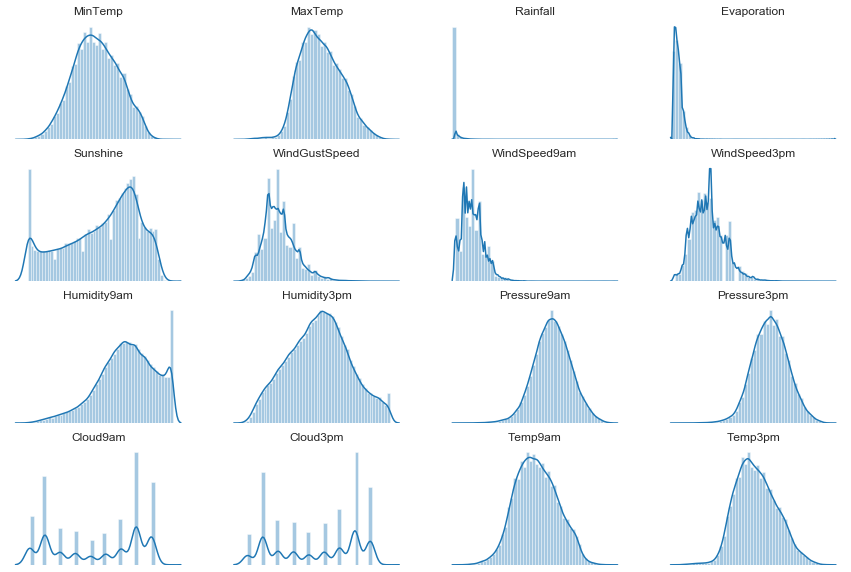

In [23]:
#Lets check the distribution of numerical features
sns.set_style('whitegrid')

plt.figure(figsize=(15,10))
for i in range(len(num_feature)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[num_feature[i]])
    plt.title(num_feature[i])
    plt.axis('off')
plt.show()

In [ ]:
#some numerical columns are skewed.

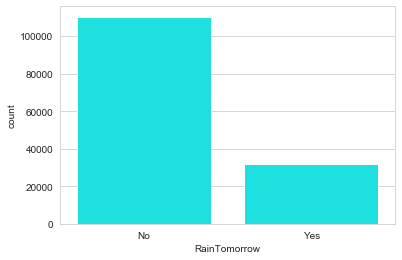

In [39]:
sns.countplot(df['RainTomorrow'],color='aqua')
#imbalanced data set

In [52]:
for col in cat_feature:
    print(f'{col}---->{df[col].nunique()}')
    
    

Date---->3436
Location---->49
WindGustDir---->16
WindDir9am---->16
WindDir3pm---->16
RainToday---->2
RainTomorrow---->2


In [ ]:
#questions to ask for
1> which year,month,day witnessed more rain
2> Location wise EDA
3> does RainToday and Tomorrow have any connection

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Year']=df['Date'].dt.year

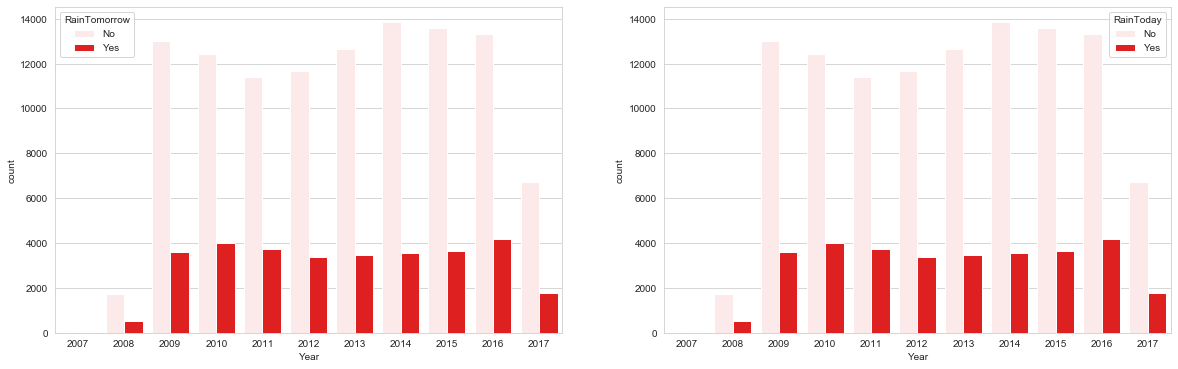

In [67]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot(df['Year'],color='red',hue=df['RainTomorrow'],ax=ax[0])
sns.countplot(df['Year'],color='red',hue=df['RainToday'],ax=ax[1])


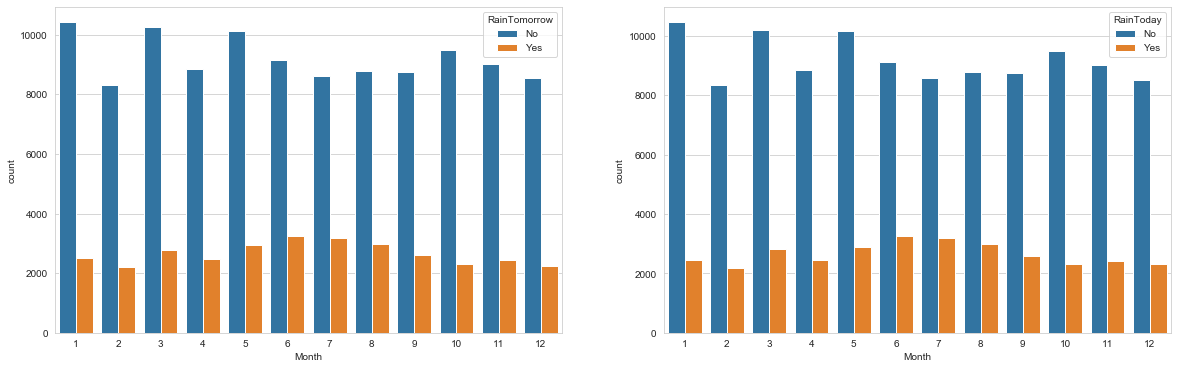

In [69]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot(df['Month'],hue=df['RainTomorrow'],ax=ax[0])
sns.countplot(df['Month'],hue=df['RainToday'],ax=ax[1])

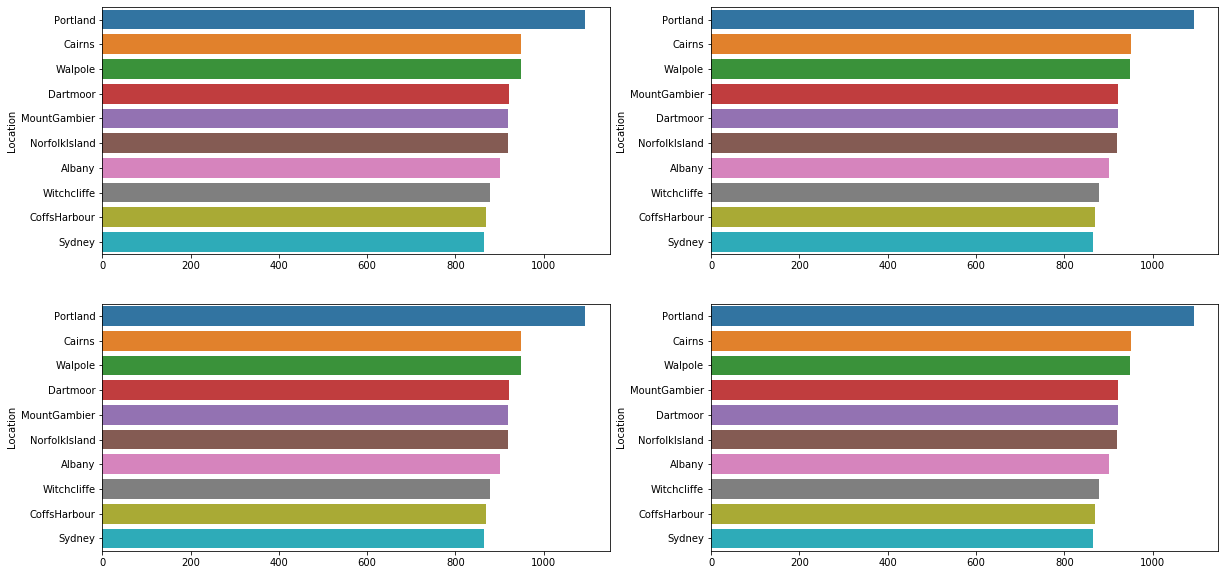

In [7]:
#Location
loc_raintom_yes=df[df['RainTomorrow']=='Yes'].groupby(['Location'])['RainTomorrow'].count().sort_values(ascending=False)[:10]
loc_raintod_yes=df[df['RainToday']=='Yes'].groupby(['Location'])['RainToday'].count().sort_values(ascending=False)[:10]


loc_raintom_no=df[df['RainTomorrow']=='No'].groupby(['Location'])['RainTomorrow'].count().sort_values(ascending=False)[:10]
loc_raintod_no=df[df['RainToday']=='No'].groupby(['Location'])['RainToday'].count().sort_values(ascending=False)[:10]

fig,ax=plt.subplots(2,2,figsize=(20,10))

sns.barplot(y=loc_raintom_yes.index,x=loc_raintom_yes.values,ax=ax[0,0])
sns.barplot(y=loc_raintod_yes.index,x=loc_raintod_yes.values,ax=ax[0,1])
sns.barplot(y=loc_raintom_yes.index,x=loc_raintom_yes.values,ax=ax[1,0])
sns.barplot(y=loc_raintod_yes.index,x=loc_raintod_yes.values,ax=ax[1,1])

In [8]:
df.groupby(['RainToday','RainTomorrow'])['RainTomorrow'].count()

RainToday  RainTomorrow
No         No              92728
           Yes             16604
Yes        No              16858
           Yes             14597
Name: RainTomorrow, dtype: int64

In [8]:
df['RainToday']=df['RainToday'].map({'No':0,"Yes":1})
df['RainTomorrow']=df['RainTomorrow'].map({'No':0,"Yes":1})

In [10]:
#Totoal=df.groupby(['RainToday'])['RainTomorrow'].count()#raintommorw yes

tomorrow_yes=df.groupby(['RainToday'])['RainTomorrow'].sum()
tomorrow_yes

RainToday
0.0    16604.0
1.0    14597.0
Name: RainTomorrow, dtype: float64

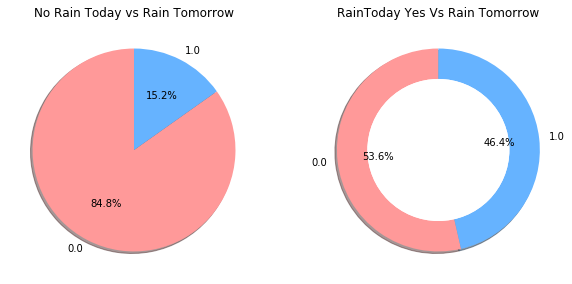

In [11]:
rain_today_no=df[df['RainToday']==0]
rain_today_yes=df[df['RainToday']==1]

colors = ['#ff9999','#66b3ff']

index = rain_today_no['RainTomorrow'].value_counts().index
val = rain_today_no['RainTomorrow'].value_counts().values

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
ax1.pie(val,labels=index,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.set_title('No Rain Today vs Rain Tomorrow')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


index_2 = rain_today_yes['RainTomorrow'].value_counts().index
val_2 = rain_today_yes['RainTomorrow'].value_counts().values

ax2.pie(val_2,labels=index_2,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('RainToday Yes Vs Rain Tomorrow')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)




In [ ]:
#84.8% of times when it does not rain today, it wont rain tomorrow
#when it rains today, the chances that it will rain tomorrow is almost same

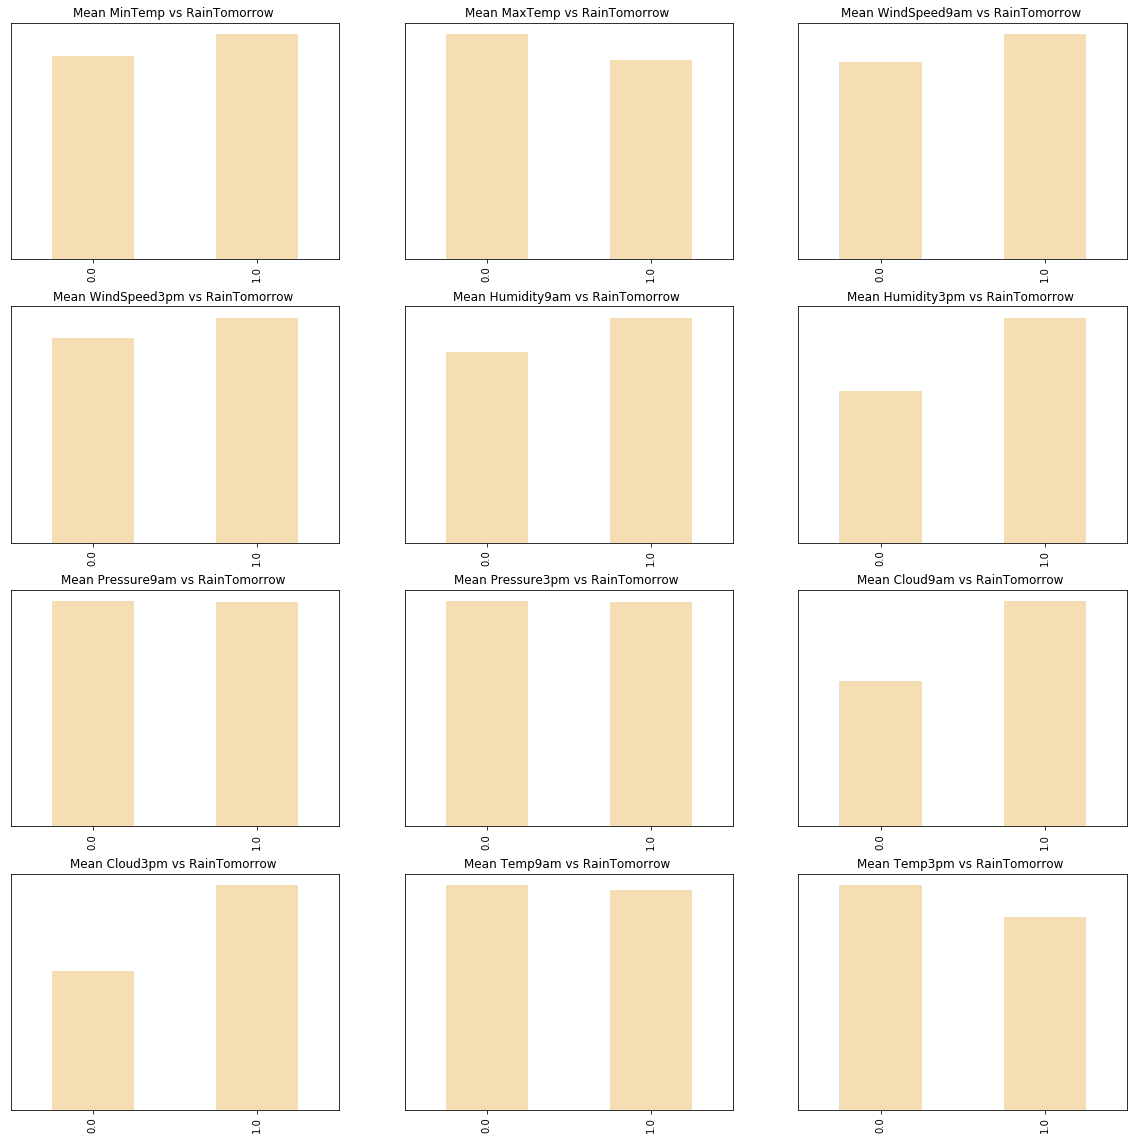

In [12]:
columns=['MinTemp', 'MaxTemp',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
plt.figure(figsize=(20,20))
for i,col in enumerate(columns):
    plt.subplot(4,3,i+1)
    df.groupby('RainTomorrow')[col].mean().plot(kind='bar',color='wheat')
    plt.title(f'Mean {col} vs RainTomorrow ')
    plt.yticks([])
    plt.xlabel('')

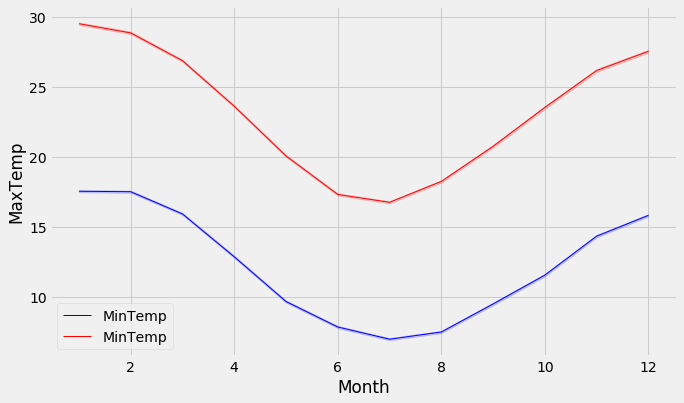

In [13]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(10,6))
sns.lineplot(df['Month'], df['MinTemp'], color='blue', linewidth=1, label= 'MinTemp')
sns.lineplot(df['Month'], df['MaxTemp'], color='red', linewidth=1, label= 'MinTemp')


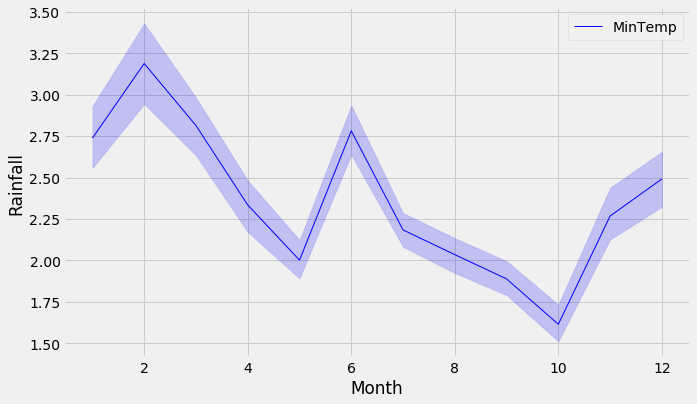

In [14]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(10,6))
sns.lineplot(df['Month'], df['Rainfall'], color='blue', linewidth=1, label= 'MinTemp')


#we can make a fetaure for highest rainfallon 2,6,12 month

Text(0.5, 0, 'Days In Year')

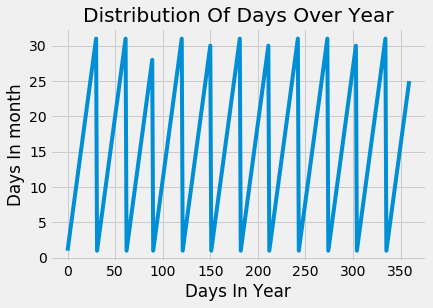

In [24]:
df['Day'][:360].plot(kind='line')
plt.title("Distribution Of Days Over Year")
plt.ylabel("Days In month")
plt.xlabel("Days In Year")

In [ ]:
# I prefer the months and days in a cyclic continuous feature. As, date and time are inherently cyclical. 
#To let the ANN model know that a feature is cyclical I split it into periodic subsections. Namely, years, months and days.
#Now for each subsection, I create two new features, deriving a sine transform and cosine transform of the subsection feature

In [28]:
def encode(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

In [30]:
df = encode(df, 'Month', 12)
df = encode(df, 'Day', 31)



Text(0.5, 0, 'Sine Encoded Day')

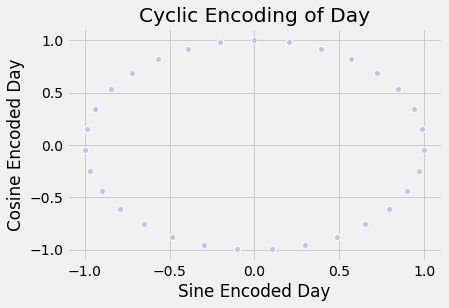

In [33]:
cyclic_day = sns.scatterplot(x='Day_sin',y='Day_cos',data=df, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

Text(0.5, 0, 'Sine Encoded Month')

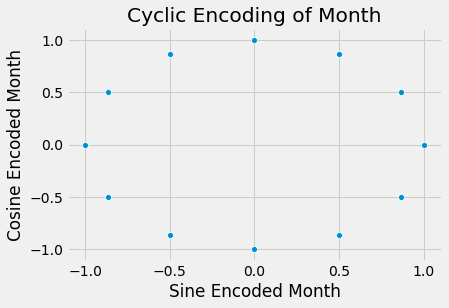

In [36]:
cyclic_day = sns.scatterplot(x='Month_sin',y='Month_cos',data=df)
cyclic_day.set_title("Cyclic Encoding of Month")
cyclic_day.set_ylabel("Cosine Encoded Month")
cyclic_day.set_xlabel("Sine Encoded Month")

In [40]:
for col in num_feature:
    df[col].fillna(df[col].median(),inplace=True) 
    
for col in cat_feature:
    df[col].fillna(df[col].mode()[0],inplace=True) 
      

# Data Preprocessing

In [46]:
label_encoder = LabelEncoder()
for i in cat_feature:
    df[i] = label_encoder.fit_transform(df[i])
    


In [101]:
features = df.drop(['RainTomorrow', 'Date','Day', 'Month'], axis=1)

target = df['RainTomorrow']

#Set up a standard scaler for the features

col_names = list(features.columns)

s_scaler = StandardScaler()

features = s_scaler.fit_transform(features)

features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,-5.633017e-14,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.243854e-15,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,6.513740e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,9.152711e-15,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,1.352327e-14,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-4.338304e-15,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,1.864381e-14,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,-1.167921e-14,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,-7.433272e-15,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,1.791486e-15,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


In [102]:
features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month_sin,Month_cos,Day_sin,Day_cos
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,1.464068,0.137693,-0.013506,0.019135,-0.529795,-1.879575,-0.016425,1.434192,0.278970,1.426023
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.149133,0.137693,0.033011,0.384064,-0.529795,-1.879575,-0.016425,1.434192,0.549587,1.339551
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,0.149133,-1.286294,0.622225,0.223495,-0.529795,-1.879575,-0.016425,1.434192,0.797572,1.199371
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,0.149133,0.137693,0.172562,0.705202,-0.529795,-1.879575,-0.016425,1.434192,1.012774,1.011221
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,1.025756,1.561680,0.126045,1.172312,-0.529795,-1.879575,-0.016425,1.434192,1.186382,0.782805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.724209,-0.683048,0.442992,-1.498165,...,0.149133,0.137693,-1.067887,0.106718,-0.529795,1.666978,-0.016425,-1.388032,-1.261688,-0.601030
145456,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.446007,-1.368977,0.442992,-1.057454,...,0.149133,0.137693,-0.943842,0.413259,-0.529795,1.666978,-0.016425,-1.388032,-1.360192,-0.330159
145457,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.085108,-0.225761,0.442992,1.366458,...,0.149133,0.137693,-0.695753,0.646814,-0.529795,1.666978,-0.016425,-1.388032,-1.403140,-0.044639
145458,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.193094,-0.911691,0.664436,-1.057454,...,-0.727490,-1.286294,-0.292607,0.632217,-0.529795,1.666978,-0.016425,-1.388032,-1.388775,0.243842


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

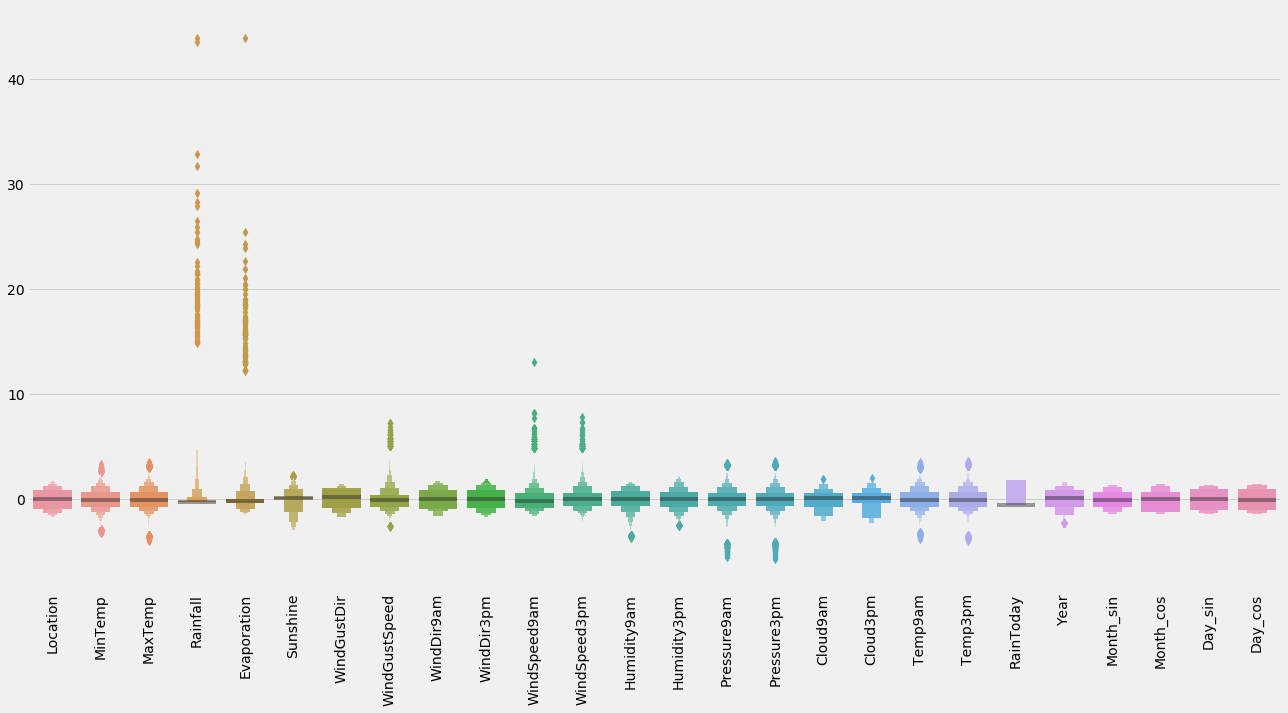

In [54]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)

In [103]:
features["RainTomorrow"] = target

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<3.8)&(features["WindGustSpeed"]>-3.7)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127205, 27)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

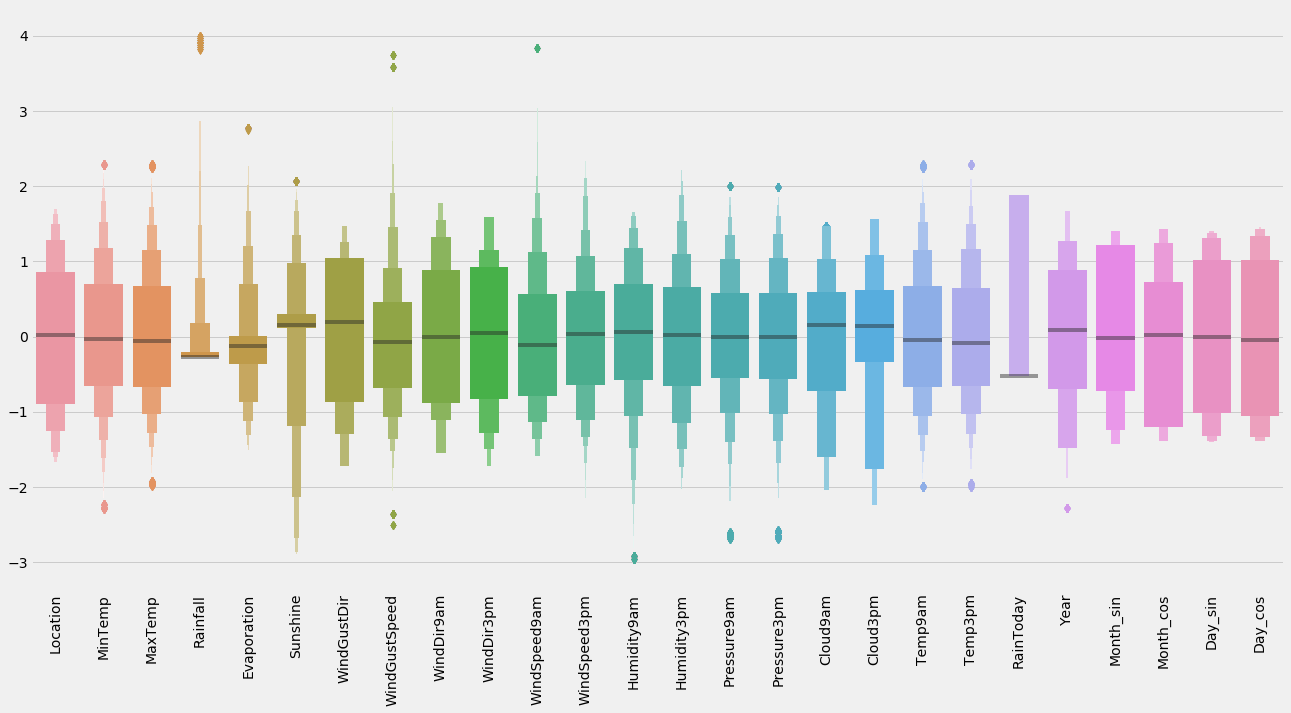

In [83]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)

In [110]:
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif
import scipy.stats as stats
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [105]:
def chi2(data,col,target):
    contigency_data = pd.crosstab(data[col],target)

    stat,pvalue,dof,exp =stats.chi2_contingency(contigency_data)

    print('stat=%.3f, p=%.3f' % (stat, pvalue))
    if pvalue > 0.05:
        print(f'No effect of {col} on target')
    else:
        print(f'There is a effect of {col} on target')
        
for col in cat_feature[2:-1]:
       chi2(features,col,target
           ) 

stat=1231.499, p=0.000
There is a effect of WindGustDir on target
stat=1513.938, p=0.000
There is a effect of WindDir9am on target
stat=1023.363, p=0.000
There is a effect of WindDir3pm on target
stat=10268.483, p=0.000
There is a effect of RainToday on target


In [106]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127205, 26)

In [111]:
#Early stopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2545/2545 [==============================] - 11s 4ms/step - loss: 0.4673 - accuracy: 0.7858 - val_loss: 0.3932 - val_accuracy: 0.7862
Epoch 2/150
2545/2545 [==============================] - 11s 4ms/step - loss: 0.4090 - accuracy: 0.7859 - val_loss: 0.3864 - val_accuracy: 0.7862
Epoch 3/150
2545/2545 [==============================] - 10s 4ms/step - loss: 0.4064 - accuracy: 0.7859 - val_loss: 0.3834 - val_accuracy: 0.7862
Epoch 4/150
2545/2545 [==============================] - 12s 5ms/step - loss: 0.4034 - accuracy: 0.7865 - val_loss: 0.3814 - val_accuracy: 0.7862
Epoch 5/150
2545/2545 [==============================] - 11s 4ms/step - loss: 0.4019 - accuracy: 0.8375 - val_loss: 0.3797 - val_accuracy: 0.8441
Epoch 6/150
2545/2545 [==============================] - 11s 4ms/step - loss: 0.3999 - accuracy: 0.8400 - val_loss: 0.3782 - val_accuracy: 0.8444
Epoch 7/150
2545/2545 [==============================] - 12s 5ms/step - loss: 0.3995 - accuracy: 0.8411 - val_loss: 0.3770 -

Epoch 57/150
2545/2545 [==============================] - 2s 946us/step - loss: 0.3876 - accuracy: 0.8455 - val_loss: 0.3670 - val_accuracy: 0.8467
Epoch 58/150
2545/2545 [==============================] - 2s 907us/step - loss: 0.3869 - accuracy: 0.8451 - val_loss: 0.3665 - val_accuracy: 0.8483
Epoch 59/150
2545/2545 [==============================] - 2s 888us/step - loss: 0.3876 - accuracy: 0.8453 - val_loss: 0.3669 - val_accuracy: 0.8467
Epoch 60/150
2545/2545 [==============================] - 2s 886us/step - loss: 0.3872 - accuracy: 0.8448 - val_loss: 0.3667 - val_accuracy: 0.8469
Epoch 61/150
2545/2545 [==============================] - 2s 917us/step - loss: 0.3868 - accuracy: 0.8450 - val_loss: 0.3668 - val_accuracy: 0.8470
Epoch 62/150
2545/2545 [==============================] - 2s 906us/step - loss: 0.3875 - accuracy: 0.8454 - val_loss: 0.3664 - val_accuracy: 0.8469
Epoch 63/150
2545/2545 [==============================] - 2s 961us/step - loss: 0.3876 - accuracy: 0.8457 - val_

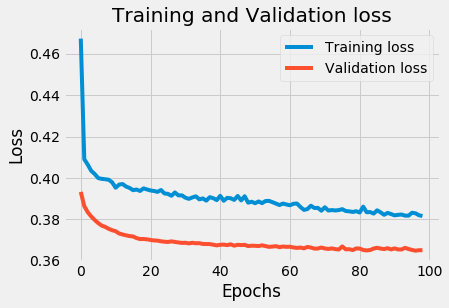

In [112]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

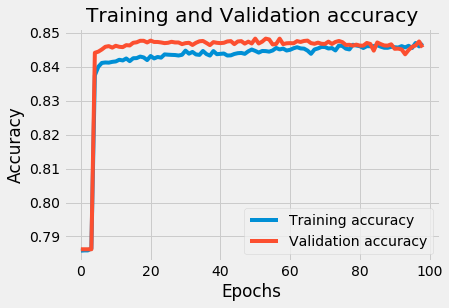

In [113]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()